<a href="https://colab.research.google.com/github/Merrill921/Machine_Learning/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабараторная работа 1

Суть - векторизовать контент статьи и кластеризовать данные

**Этап 1 - нормализация**

С помощью библиотеки natasha или pymorphy 2 - преобразовать текст в нормальную форму, выбросить стоп-слова

**Этап 2 - веткоризация**

Используйте 1 из представленных способов

- CountVectorizer (sklearn)
- TFIDFVectrorizer (sklearn)
- Word2Vec (gensim)

**Этап 3 - Сжатие векторов**

С помощью PCA - сжать векторы до 2-точек, для построения кластеров

**Этап 3 - клатеризация**

- использовать KMeans
- Использовать DBSSCAN

**Этап 4 - результаты анализа**

Выделить темы, по которым были построены кластеры

In [2]:
!pip install natasha
!pip install gensim
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 85.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=412fc6e10c6d886c4c2f63cfd729fff50249cf01ec4e65fa2adeeca8ea9b4b38
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=c39c8ceb72a5dcf75d242fed1e32e90c96d6f04649837215c35af246f65b3f71
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree


In [3]:
import sqlite3
import json
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, Doc
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Функция для извлечения данных из базы данных SQLite
def load_articles_from_db(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    cursor.execute("SELECT title, body FROM articles")
    articles = cursor.fetchall()
    conn.close()
    return articles

# Загружаем статьи из базы данных
db_path = 'articles.db'
articles = load_articles_from_db(db_path)

# Инициализация Natasha компонентов
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

def normalize_text(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.parse_syntax(syntax_parser)
    doc.tag_ner(ner_tagger)

    tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in ENGLISH_STOP_WORDS and token.lemma.isalpha():
            tokens.append(token.lemma)
    return ' '.join(tokens)

# Нормализация всех статей
normalized_articles = [normalize_text(article[1]) for article in articles]  # article[1] это body статьи
# Выводим несколько примеров нормализованных текстов
print("Примеры нормализованных текстов:")
for i, norm_text in enumerate(normalized_articles[:3]):
    print(f"Статья {i+1}: {norm_text}\n")


Примеры нормализованных текстов:
Статья 1: фото marjorie bertrand unsplash исследователь центр персонализировать медицина детский больница раскрыть новый генетический причина детский хордома редкий и опасный форма рак результат исследование опубликовать в журнал molecular cancer research хордом представлять себя агрессивный опухоль кость который часто встречаться у ребенок в основание череп исследователь изучить как ядерный так и митохондриальный днк ученый выявить два класс генетический триггер вызывать различный подтип хордом метод включать секвенирование экзон кодировать аминокислотный последовательность область весь ген ядерный и митохондриальный геном образец хордом получить от ребенок этот образец быть собрать в шесть различный академический медицинский центр сша у процент пациент обнаружить мутация выразить короткий вставка и делеция в ген arid b этот мутация являться потенциальный фактор риск как и ранее выявить дефект в ген smarcb также выявить значительный мутация митохондриа

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(normalized_articles)

# Выводим примеры векторов
print("Примеры векторов TF-IDF (первые 3 статьи):")
print(X[:3].toarray())

# Выводим статистику по векторам
mean_vector = np.mean(X.toarray(), axis=0)
std_vector = np.std(X.toarray(), axis=0)
print("Среднее значение по векторам TF-IDF:")
print(mean_vector)
print("Стандартное отклонение по векторам TF-IDF:")
print(std_vector)

Примеры векторов TF-IDF (первые 3 статьи):
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05564125 0.         ... 0.07015001 0.         0.        ]]
Среднее значение по векторам TF-IDF:
[0.00228283 0.01074441 0.00777675 0.00873844 0.00805425 0.02382547
 0.00805425 0.01250705 0.01531923 0.01074441 0.0228844  0.01531923
 0.01011112 0.0228844  0.00724955 0.00430325 0.00430325 0.01133872
 0.00519551 0.02741954 0.01190488 0.01157332 0.00606667 0.02462083
 0.00999001 0.00842019 0.00625353 0.0050032  0.00658908 0.00713371
 0.01246133 0.00842019 0.01219145 0.01555351 0.0188494  0.01557182
 0.01152985 0.01075813 0.00625353 0.0105225  0.00781795 0.00920682
 0.01975106 0.0080889  0.01326845 0.00938029 0.04290143 0.00606667
 0.01820002 0.0068485  0.0080889  0.00378421 0.00378421 0.01895899
 0.01198543 0.006282   0.00555212 0.00430325 0.00843715 0.00713916
 0.00781795 0.00404445 0.00622

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X.toarray())

# Выводим сжатые векторы
print("Примеры сжатых векторов после PCA (первые 3 статьи):")
print(X_reduced[:3])

# Выводим объясненную дисперсию для компонентов PCA
explained_variance = pca.explained_variance_ratio_
print("Объясненная дисперсия для компонентов PCA:")
print(explained_variance)
print(f"Суммарная объясненная дисперсия: {np.sum(explained_variance)}")

Примеры сжатых векторов после PCA (первые 3 статьи):
[[-0.14449814  0.04736597]
 [ 0.12857716  0.0381595 ]
 [ 0.13991519  0.18182803]]
Объясненная дисперсия для компонентов PCA:
[0.0730944  0.06462136]
Суммарная объясненная дисперсия: 0.13771575576363443


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Кластеры:


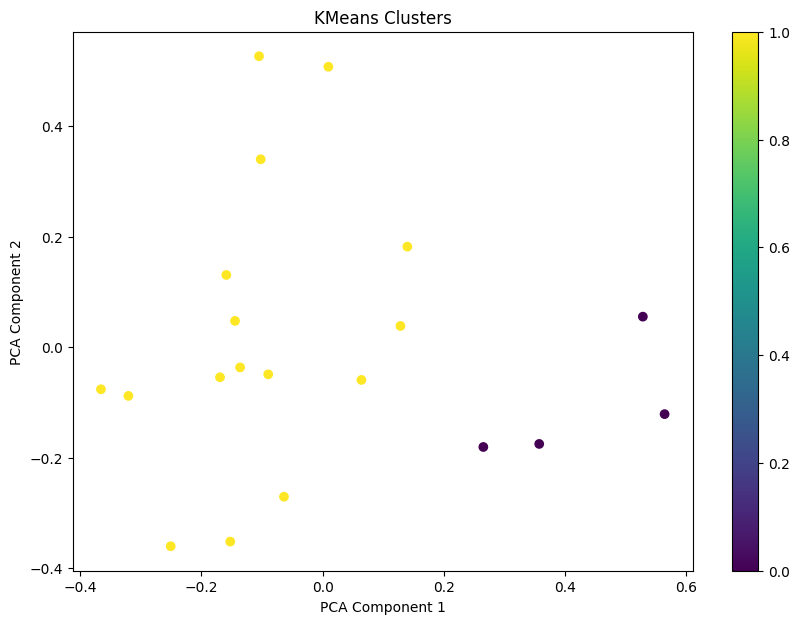

DBSCAN Кластеры:


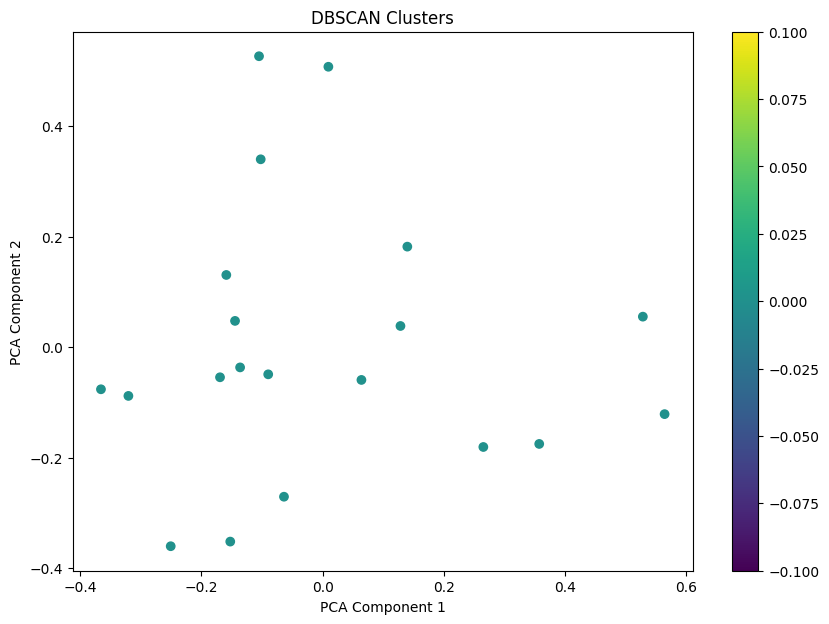

In [11]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# KMeans кластеризация
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_reduced)

# DBSCAN кластеризация
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_reduced)

# Визуализация кластеров
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

print("KMeans Кластеры:")
plot_clusters(X_reduced, kmeans_labels, 'KMeans Clusters')

print("DBSCAN Кластеры:")
plot_clusters(X_reduced, dbscan_labels, 'DBSCAN Clusters')


In [12]:
import numpy as np
import pandas as pd

def get_top_terms_per_cluster(vectorizer, X, labels, n_terms=10):
    # Преобразуем X в DataFrame и добавляем метки кластеров
    df = pd.DataFrame(X.toarray()).assign(cluster=labels)
    # Группируем данные по меткам кластеров и вычисляем среднее для каждого признака
    df = df.groupby('cluster').mean()
    terms = vectorizer.get_feature_names_out()
    for i, row in df.iterrows():
        print(f"\nКластер {i}")
        print(', '.join([terms[t] for t in np.argsort(row)[-n_terms:]]))

print("Ключевые слова для каждого кластера (KMeans):")
get_top_terms_per_cluster(vectorizer, X, kmeans_labels)

Ключевые слова для каждого кластера (KMeans):

Кластер 0
техника, рынок, продажа, уголь, миллион, машина, до, год, процент, на

Кластер 1
тысяча, рубль, быть, тот, не, это, он, по, что, на
